In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


https://www.kaggle.com/datasets/aiaiaidavid/the-big-dataset-of-ultra-marathon-running/data --> veri kaynağı

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("TWO_CENTURIES_OF_UM_RACES.csv")
data.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


###### 2020 yılında gerçekleşmiş ülke değeri USA olan 50km veya 50mi koşularını istiyorum. çalışma bu veriler üzerine olacak.

In [4]:
data.isna().sum() # Athlete year of birth sütunu büyük ihtimal 1900 den öncesi sıkıntılıdır diye tahmin ediyorum.

Year of event                      0
Event dates                        0
Event name                         0
Event distance/length           1053
Event number of finishers          0
Athlete performance                2
Athlete club                 2826524
Athlete country                    3
Athlete year of birth         588161
Athlete gender                     7
Athlete age category          584938
Athlete average speed            224
Athlete ID                         0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7461195 entries, 0 to 7461194
Data columns (total 13 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Year of event              int64  
 1   Event dates                object 
 2   Event name                 object 
 3   Event distance/length      object 
 4   Event number of finishers  int64  
 5   Athlete performance        object 
 6   Athlete club               object 
 7   Athlete country            object 
 8   Athlete year of birth      float64
 9   Athlete gender             object 
 10  Athlete age category       object 
 11  Athlete average speed      object 
 12  Athlete ID                 int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 740.0+ MB


In [6]:
data["Event name"].str.split(pat = "(" , expand = True)[1].str.replace(")", "")
# ülke filtresi yukarıidaki kodu kolayca fancy ile asıl df e yerleştirbilirim. 
#
# get fonksiyonunu kullansaydım daha güzel olabilirdi.[1] yerien .get(1)

0          CHI
1          CHI
2          CHI
3          CHI
4          CHI
          ... 
7461190    FRA
7461191    FRA
7461192    HUN
7461193    HUN
7461194    HUN
Name: 1, Length: 7461195, dtype: object

In [25]:
df = data[(data["Event distance/length"].isin(["50km","50mi"]))
        & (data["Year of event"] == 2020) &
        (data["Event name"].str.split(pat = "(" , expand = True)[1].str.replace(")", "") == "USA")]

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26090 entries, 2539945 to 2760961
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year of event              26090 non-null  int64  
 1   Event dates                26090 non-null  object 
 2   Event name                 26090 non-null  object 
 3   Event distance/length      26090 non-null  object 
 4   Event number of finishers  26090 non-null  int64  
 5   Athlete performance        26090 non-null  object 
 6   Athlete club               22971 non-null  object 
 7   Athlete country            26090 non-null  object 
 8   Athlete year of birth      25857 non-null  float64
 9   Athlete gender             26090 non-null  object 
 10  Athlete age category       25873 non-null  object 
 11  Athlete average speed      26090 non-null  object 
 12  Athlete ID                 26090 non-null  int64  
dtypes: float64(1), int64(3), object(9)
memory u

In [27]:
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281


Şu an elimdeki tüme verilerin USA de gerçekleşen etkinlikler olduğunu biliyorum o yüzden Event name sütununda bu bilginin bulunması gereksiz.

In [28]:
print(df["Event name"].str.split("(").str.get(0).nunique() ) ;  print(df["Event name"].str.split("(").str.get(1).nunique())

# sadece 1 ülke var zaten. silelim. 490 farklı etkinlik ismi var o kalsın mesela işe yarar.

490
1


In [29]:
# remove USA

In [30]:
df["Event name"] = df["Event name"].str.split("(").str.get(0)

In [31]:
df.head(3)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838


ilgilenilmesi gereken farklı bir sorun daha var : Athlete age category özelliğinde M,MU gibi karakterler var çok saçma sadece yaş gösterse yeterl, zaten.

 Athlete year of birth değeri float , ve ben elimdeki tüm etkinliklerin 2020 yılında gerçekleitiğini biliyorum o yüzden 2020-  Athlete year of birth yaparsam yarışçıların yaşı ortaya çıkar. yeni bir sütun olarak da ekleyebilirim.

In [32]:
df["Athlete_age"] = 2020 -  df["Athlete year of birth"] 

In [33]:
df.head(3)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838,21.0


Athlete performance değerlerinde de "h" karakteri gidebilir. gereksiz duruyor.

In [34]:
# remove h from athlet performance.
df["Athlete performance"] = df["Athlete performance"].str.split(" ").str.get(0)

Athlete club değerlerinin pek bir önemi olmadığı için drop mantıklı bir yöntem olacaktır. Athlete country de aynı şekilde. Ayrıca yaş değeri elimde olduğundan dolayı Athlete year of birth ve Athlete age category değeri de gitsin.

In [35]:
df = df.drop(columns=["Athlete club" ,"Athlete year of birth" , "Athlete age category" , "Athlete country"] ,
             axis = 1)

In [36]:
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43.0


In [38]:
# missing values
df.isna().sum()

Year of event                  0
Event dates                    0
Event name                     0
Event distance/length          0
Event number of finishers      0
Athlete performance            0
Athlete gender                 0
Athlete average speed          0
Athlete ID                     0
Athlete_age                  233
dtype: int64

In [39]:
df[df["Athlete_age"].isna() == 1] # null değere sahip kayıtları görmeni sağlayan kod parçası.

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Athlete_age
2547794,2020,25.01.2020,North Carolina Fat Ass 50 Km,50km,57,6:10:30,M,8.097,811923,NaN
2551331,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,4:46:34,M,10.469,812656,NaN
2551336,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,5:08:36,M,9.721,812657,NaN
2551344,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,5:54:04,F,8.473,658221,NaN
2551348,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,6:07:11,M,8.17,812660,NaN
...,...,...,...,...,...,...,...,...,...,...
2746543,2020,17.10.2020,Black River Trail Classic 50 Km,50km,8,8:31:26,F,5.866,857251,NaN
2749869,2020,17.10.2020,MuleSkinner Endurance 50 Mile Race,50mi,27,11:55:05,M,6.752,857957,NaN
2755985,2020,10.10.2020,Man Against Horse 50 Mile Race,50mi,23,9:03:25,M,8.885,859462,NaN
2755994,2020,10.10.2020,Man Against Horse 50 Mile Race,50mi,23,10:37:00,M,7.579,398583,NaN


In [42]:
# 233 kayıt  silinse daha  iyi olur gibi duruyor. elimdeki veri seti aşırı büyük olduğunda fazla etkilemez beni.
df = df.dropna()

In [44]:
df.isna().sum().sum() # tüm tablodaki toplam eksik değer sayısı!

0

eksik değerlerle birlikte akla hemen duplicated değerler gelmeli. Onları da tespit etmek çok önemli ve kolay.

In [46]:
df[df.duplicated() == True] # tekrarlı kayıt yok :)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Athlete_age


reset index ile son tabloyu şekillendirebilirim.

In [47]:
df.reset_index(drop = True)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Athlete_age
0,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29.0
1,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39.0
2,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21.0
3,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37.0
4,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43.0
...,...,...,...,...,...,...,...,...,...,...
25852,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:07:48,F,7.013,816361,62.0
25853,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:22,F,6.706,326469,43.0
25854,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:24,F,6.705,372174,58.0
25855,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:38:30,F,6.543,860349,39.0


 kabus halien gelebilecek "fixing types" adlı aşamaya geçiyorum. 

In [48]:
df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed         object
Athlete ID                     int64
Athlete_age                  float64
dtype: object

In [49]:
df["Athlete_age"] = df["Athlete_age"].astype(int)

In [50]:
df["Athlete average speed"] = df["Athlete average speed"].astype(float)

In [51]:
# rename columns

In [56]:
# Sütun isimlerini düzenle
new_columns = {
    'Year of event': 'year',
    'Event dates': 'event_dates',
    'Event name': 'event_name',
    'Event distance/length': 'event_length',
    'Event number of finishers': 'event_number_of_finishers',
    'Athlete performance': 'athlete_performance',
    'Athlete gender': 'athlete_gender',
    'Athlete average speed': 'athlete_average_speed',
    'Athlete ID': 'athlete_id',
    'Athlete_age': 'athlete_age'
}

# Veri çerçevesindeki sütun isimlerini değiştir
df.rename(columns=new_columns, inplace=True)
# yapay zeka ne güzel şey.

In [57]:
df.columns

Index(['year_of_event', 'event_dates', 'event_name', 'event_distance_length',
       'event_num_finishers', 'athlete_performance', 'athlete_gender',
       'athlete_avg_speed', 'athlete_id', 'athlete_age'],
      dtype='object')

In [58]:
df.head(1)

,year_of_event,event_dates,event_name,event_distance_length,event_num_finishers,athlete_performance,athlete_gender,athlete_avg_speed,athlete_id,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29


In [59]:
# reorder columns

In [75]:
df2 = df[["event_dates","athlete_id","event_name","event_distance_length","event_num_finishers","athlete_gender","athlete_performance","athlete_avg_speed","athlete_age"]]

In [76]:
df2.reset_index(drop=True , inplace=True)

In [77]:
df2.head(2) # tüm yarışlar 2020 de yapıldı için o sütundan da kurtulmuş oldum yukarıda.

,event_dates,athlete_id,event_name,event_distance_length,event_num_finishers,athlete_gender,athlete_performance,athlete_avg_speed,athlete_age
0,02.02.2020,71287,West Seattle Beach Run - Winter Edition,50km,20,M,3:17:55,15.158,29
1,02.02.2020,629508,West Seattle Beach Run - Winter Edition,50km,20,M,4:02:32,12.369,39


grafikler gelsin.

<Axes: xlabel='event_distance_length', ylabel='Count'>

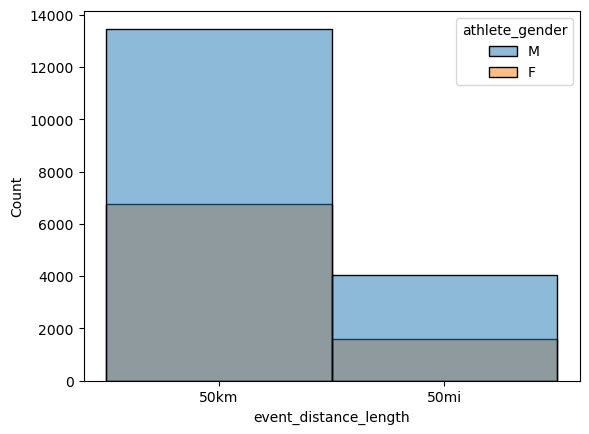

In [86]:
# cinsiyetlere göre ne kadar mesafe koşulmuş ?
sns.histplot( data = df2 , x = 'event_distance_length', hue = 'athlete_gender')

50 mil bi tık daha zor olduğundan farklar olacak tabii ki.

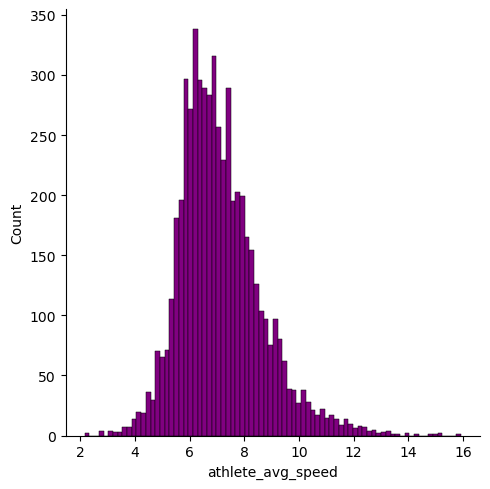

In [98]:
# 50 mil koşanların prtalama hız dağılımları. 

miles  = df2[df2['event_distance_length'] == '50mi']
sns.displot(miles['athlete_avg_speed'], kde = False , bins = 80 , color = "purple" , alpha = 1)
# displot ile distplot farklı şeylermiş!!!

yarış mesafesine göre kadınların ve erkeklerin ortalama hızlarını karşılaştıracağım. violinplot ile yapılır.

<Axes: xlabel='event_distance_length', ylabel='athlete_avg_speed'>

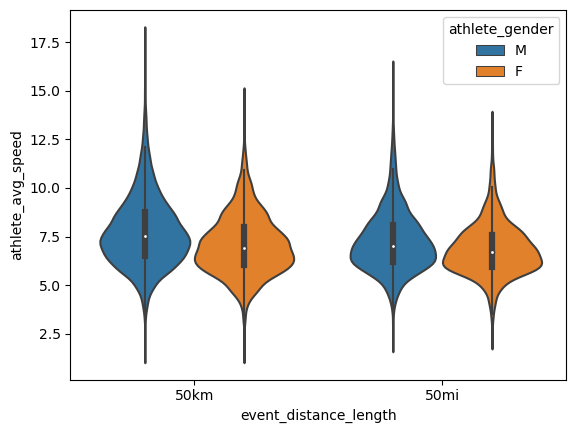

In [101]:
sns.violinplot(data = df2 , x =  'event_distance_length', y = "athlete_avg_speed", hue = "athlete_gender" )

<Axes: xlabel='event_distance_length', ylabel='athlete_avg_speed'>

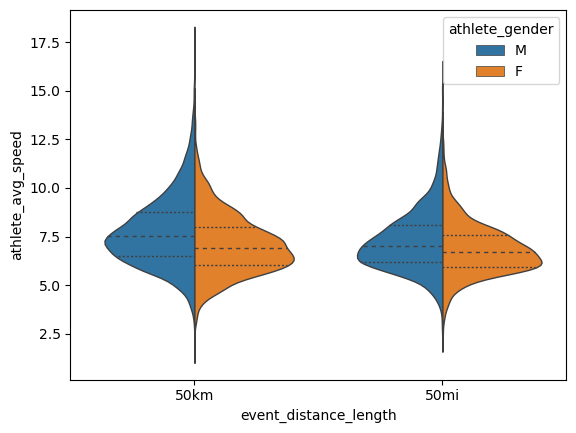

In [102]:
# bi tık değişik bir violinplot ile cinsiyetler arasındaki fark daha net görülüyor.
sns.violinplot(data = df2 , x =  'event_distance_length', y = "athlete_avg_speed", hue = "athlete_gender" ,
              split = True , inner = "quart" , linewidth=1)

50km/mi için erkekler bi tık daha önde gibi. Bunun daha uzun esaf yarışları da var inceleyebilirim sonra . 100km için nasıl bir değişiklik olur mesela ? .

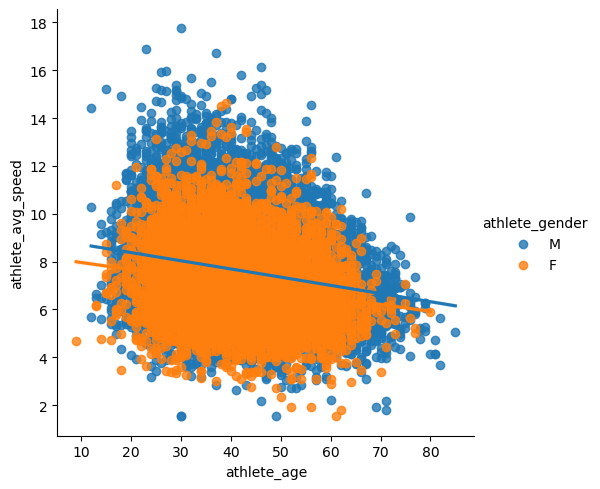

In [105]:
# yaşa göre ortalama hız nasıl ? cinsiyete göre de ayırarak baktımyine. burada da regresyon eğrisi olamsı güzel.
sns.lmplot(data = df2 , x ="athlete_age" , y = "athlete_avg_speed" , hue="athlete_gender")

üstteki grafik için normal scatterplot da çizilebilir:

<Axes: xlabel='athlete_age', ylabel='athlete_avg_speed'>

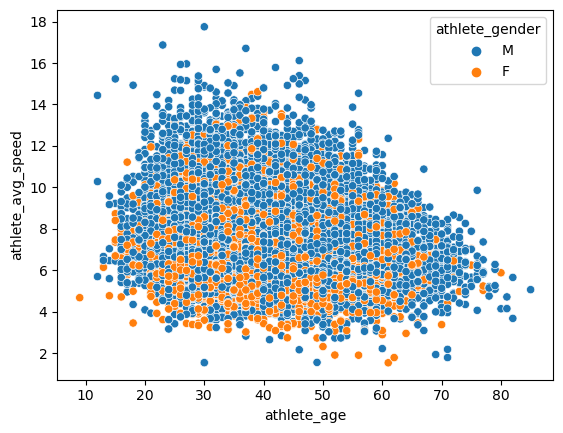

In [108]:
sns.scatterplot(data = df2, x = 'athlete_age', y ='athlete_avg_speed', hue = 'athlete_gender')

In [119]:
# Difference in speed for the 50KM and 50mi male to female

df2.groupby(['event_distance_length', 'athlete_gender'])['athlete_avg_speed'].mean()

event_distance_length  athlete_gender
50km                   F                 7.083011
                       M                 7.738985
50mi                   F                 6.834371
                       M                 7.257633
Name: athlete_avg_speed, dtype: float64

In [120]:
# What age groups abobe 20 are best in 50 Mile race

age = df2[df2['event_distance_length'] == '50mi'].groupby(['athlete_age'])['athlete_avg_speed'].mean()

age =pd.DataFrame(age)
age.head()

,athlete_avg_speed
athlete_age,
12,10.2800
13,6.1980
14,5.9080
15,8.4060
16,6.6554


In [121]:
age = age['athlete_avg_speed'].reset_index()
age.head()

,athlete_age,athlete_avg_speed
0,12,10.2800
1,13,6.1980
2,14,5.9080
3,15,8.4060
4,16,6.6554


In [123]:
import matplotlib.pyplot as plt

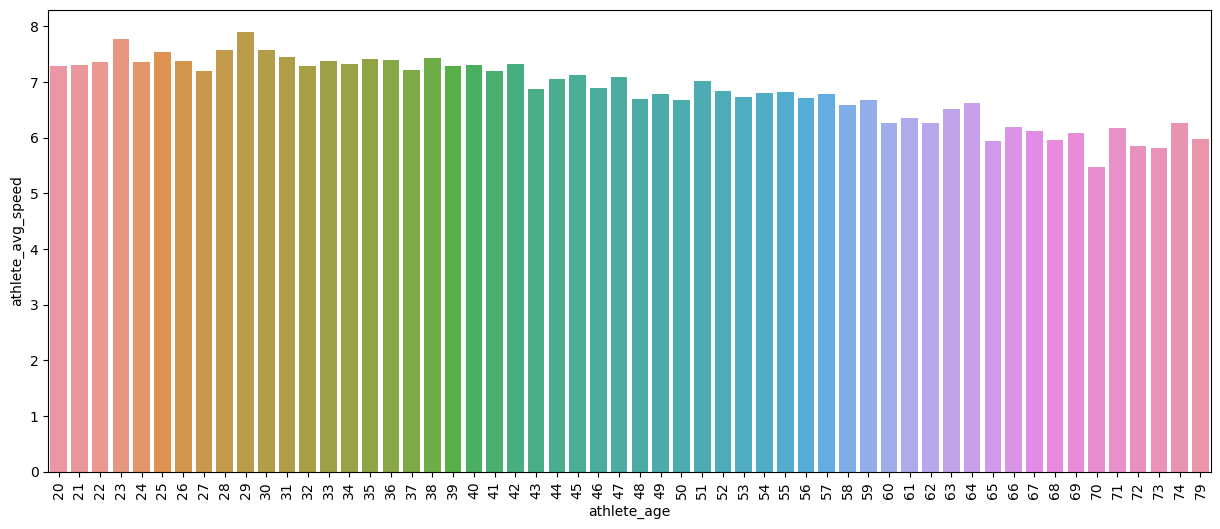

In [127]:
plt.figure(figsize=(15, 6))
sns.barplot(data = age[age['athlete_age'] >= 20.0] , x = 'athlete_age', y = 'athlete_avg_speed' )
plt.xticks(rotation=90)
plt.show()